
#Text Classification (Group Assignment 1)

>Take five different samples of Gutenberg digital books (or your choice of text corpus), which are of five different authors, that you suspect are of the same genres and are semantically the same. For example, choose two of the books 1- The Brothers Karamazov and 2- Thus Spoke Zarathustra.

>Separate and set aside unbiased random partitions for training, validation and testing.

>The overall objective is to produce classification predictions and compare them; analyze the pros and cons of algorithms and generate and communicate the insights.

 >Gauge the bias and variability of the models to decide the champion model. Then play with the features and other factors that provide you with leverages to make it harder for the model to predict and bring the accuracy down for about 20% and then check the bias and variability.

**Prepare the data**: create random samples of 200 documents of each book, representative of the source input. Prepare the records of 100 words records for each document, label them as a, b and c etc. as per the book they belong to.

**Preprocess the data**: remove stop-words and garbage characters if needed.

**Transform** to BOW, and TF-IDF, n-gram, (LDA, word-embedding, optional) etc.

**Train** a machine that can tell which author (or genre), when asked!

**Evaluation**: Do ten-fold cross-validation.

Perform **Error-Analysis**: Identity what were the characteristics of the instance records that threw the machine off.

**Document** your steps, explain the results effectively, using graphs.

**Verify** and validate your programs; Make sure your programs run without syntax or logical errors.

Massage the data: Reduce the number of words per document if the accuracy is too high and then repeat the above steps.

----------------------------------------------------------

#Rubric: (accounts for 20% of the final grade.)

Choose data of your choice, (labelled data) 1%

Preprocessing and Data Cleansing 1%

Feature Engineering 2%

Use SVM, Decision Tree, k-Nearest Neighbor, (Deep-learning optional) etc. 2%

Perform Evaluations, 2%

Compare and decide which algorithm is performing as the champion model 0.5%

Perform Error Analysis, 2%

Perform Visualizations, Graph the results 2%

One or Two pages of presentation 0.5%

The report, detail explanations 2%

Analysis of Bias and Variability 2%

Identifying, measuring and control the machine’s thresholds of factors of prediction hardship 2%

Group work: 1%

 

**Quality Notes**: Cohesion of your deliverables and the story counts most; the overall story should be organized and intertwined and be consistent with each insightful element. Have an insightful story to tell about the semantic nature of your chosen corpus.

Your principal task is to provide an insightful story!

Each group’s deliverables and insightful stories and technical measures should differ from one another among groups so that your presentation provides exceptional value to the class.

Group members should present interesting aspects of their classification exercise. Seriously avoid repetitive concepts that the class is already aware of.


#Classfication Project Checklist

1. Clean data,

2. Partition data,

3. Label data,

4. Text transformation, 

5. Classification

6. Evaluation.

7. Error Analysis

8. Visualization

**Notes**:

> only pass the strings of books’ paragraphs to transform (BOW, TFIDT, LDA, Doc2Vec) not the labels, author names.

> Evaluation: Cross-validation, split data into test and train sets.

> K-fold Cross validation is for the evaluation step to compare and select the champion model which includes among the choices of transformation and the classification algorithms plus other parameters that gave you the results.
You use the evaluations to report why you chose the champion model among other experiments.

>You can then use the champion predictions against test data to do error analysis. See where it made mistakes and form an exciting story about those errors.

In [ ]:
import nltk
from nltk.corpus import gutenberg
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics # confusion matrix

from urllib.request import urlopen
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier



In [ ]:
nltk.download('stopwords') 
nltk.download('gutenberg')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

https://www.gutenberg.org/ebooks/11200 The World War and What was Behind It; Or, The Story of the Map of Europe by Bénézet
https://www.gutenberg.org/files/11200/11200-0.txt


https://www.gutenberg.org/ebooks/45542
Eighteen Months in the War Zone by Kate John Finze
https://www.gutenberg.org/cache/epub/45542/pg45542.txt


https://www.gutenberg.org/ebooks/7189
A Short History of the Great War by A. F. Pollard
https://www.gutenberg.org/cache/epub/7189/pg7189.txt



https://www.gutenberg.org/ebooks/28257
The Story of the Great War, Volume 1 by Churchill, Miller, and Reynolds
https://www.gutenberg.org/cache/epub/28257/pg28257.txt

https://www.gutenberg.org/ebooks/30285
How I Filmed the War by Geoffrey H. Malins
https://www.gutenberg.org/cache/epub/30285/pg30285.txt

all of them are about world war I,
we think that there are some similarity


# 

In [ ]:
class Sampling:
 
  #cleaning book data from stop words and punctuation
  def wordPreparation(tokenized_word, flg_stemm=False, flg_lemm=True):
    stop_words=set(stopwords.words("english"))
    
    ## Removing stop words and punctuation 
    filtered_words=[x for x in tokenized_word if x.lower() not in stop_words and x.isalnum() ]
    
    
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        filtered_words = [ps.stem(word) for word in filtered_words]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        filtered_words = [lem.lemmatize(word) for word in filtered_words]
  
    
    return filtered_words

  def read_url(url):
    txt_file = urlopen(url)
    txt=""
    flag=False
    for line in txt_file:
      decoded_line = line.decode("utf-8")
      if flag:
        txt+= decoded_line
      elif "*** START" in decoded_line or "***START" in decoded_line:
        flag = True
      elif "***END" in decoded_line or "*** END" in decoded_line:
        flag = False
    return txt
 
  #divide book to partitions(100 word) and 200 sample if founded 
  def getSamplesOfBook(filtered_words,book_name):
    samples = []
    n= len(filtered_words)
    count= 0
 
    #shuffle book words 
    #np.random.shuffle(filtered_words)
    
    while n>100 and count <200:
      part = filtered_words[(count*100):100+(count*100)]
      n-= 100
      count+=1
      ## back to string from list
      text = " ".join(part)
      #row = (part,book_name)
      samples.append( (text,part, book_name))
      df = pd.DataFrame(samples,columns=['text','words','book_name'])
    return df

In [ ]:

#list of books names
book_list = ['The World War and What was Behind It; Or, The Story of the Map of Europe by Bénézet',
             'Eighteen Months in the War Zone by Kate John Finze',
             'A Short History of the Great War by A. F. Pollard',
             'The Story of the Great War, Volume 1 by Churchill, Miller, and Reynolds',
             'How I Filmed the War by Geoffrey H. Malins'] 

#books' text url
books_urls = ['https://www.gutenberg.org/files/11200/11200-0.txt',
             'https://www.gutenberg.org/cache/epub/45542/pg45542.txt',
             'https://www.gutenberg.org/cache/epub/7189/pg7189.txt',
             'https://www.gutenberg.org/cache/epub/28257/pg28257.txt',
             'https://www.gutenberg.org/cache/epub/30285/pg30285.txt']

df = pd.DataFrame(columns=['text','words','book_name','label']) #declare datafram for result

#get all books of gutenberg and sampling them
for i in range(len(book_list)):
  url = books_urls[i]
  txt= Sampling.read_url(url)
  #txt = urlopen(books_urls[i]).read().decode('utf-8')
  tokenized_word = nltk.word_tokenize(txt)
  #tokenized_word = nltk.RegexpTokenizer(r"\w+").tokenize(txt)
  filtered_words = Sampling.wordPreparation(tokenized_word,flg_stemm=False, flg_lemm=False)
  s = Sampling.getSamplesOfBook(filtered_words,book_list[i])
  s['label'] = i+1
  df = df.append(s,ignore_index=True)

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df

,text,words,book_name,label
0,unlike waged since Napoleon sent Helena 1815 r...,"[unlike, waged, since, Napoleon, sent, Helena,...",A Short History of the Great War by A. F. Pollard,3
1,Certainly said got trench map blankets grub bl...,"[Certainly, said, got, trench, map, blankets, ...",How I Filmed the War by Geoffrey H. Malins,5
2,sailors pilot excited population reached shore...,"[sailors, pilot, excited, population, reached,...",Eighteen Months in the War Zone by Kate John F...,2
3,away petty distinctions class creed fuse vario...,"[away, petty, distinctions, class, creed, fuse...","The Story of the Great War, Volume 1 by Church...",4
4,every obstacle time Moses modern machine gun i...,"[every, obstacle, time, Moses, modern, machine...","The Story of the Great War, Volume 1 by Church...",4
...,...,...,...,...
995,elaborate fortifications Verdun Toul Nancy Str...,"[elaborate, fortifications, Verdun, Toul, Nanc...",A Short History of the Great War by A. F. Pollard,3
996,weeping figures kitchen pulled together preten...,"[weeping, figures, kitchen, pulled, together, ...",Eighteen Months in the War Zone by Kate John F...,2
997,Dunes Secured Fine Films Collision Obstructive...,"[Dunes, Secured, Fine, Films, Collision, Obstr...",How I Filmed the War by Geoffrey H. Malins,5
998,proceed far assumption might treated insult ho...,"[proceed, far, assumption, might, treated, ins...",A Short History of the Great War by A. F. Pollard,3


#Visualization

In [ ]:
def mostFreq(df,y):
  lst_tokens = df[df["book_name"]==y]["words"]
  test_list1 = []
  for i in lst_tokens :
    test_list1 = np.append(test_list1, i, axis=None)

  lst_tokens = test_list1
  fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20, 4))
  fig.suptitle("Most frequent words in "+y, fontsize=15)
    
  ## unigrams
  dic_words_freq = nltk.FreqDist(lst_tokens)
  dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
  dtf_uni.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
  ax[0].set(ylabel=None)
    
  ## bigrams
  dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
  dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
  dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
  dtf_bi.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
  ax[1].set(ylabel=None)
  plt.show()

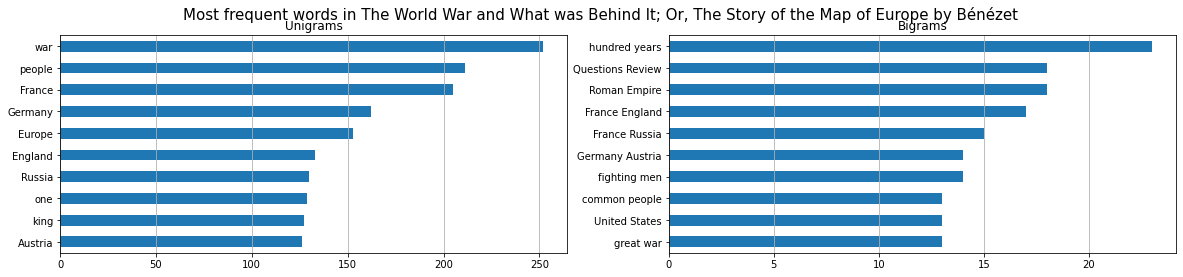

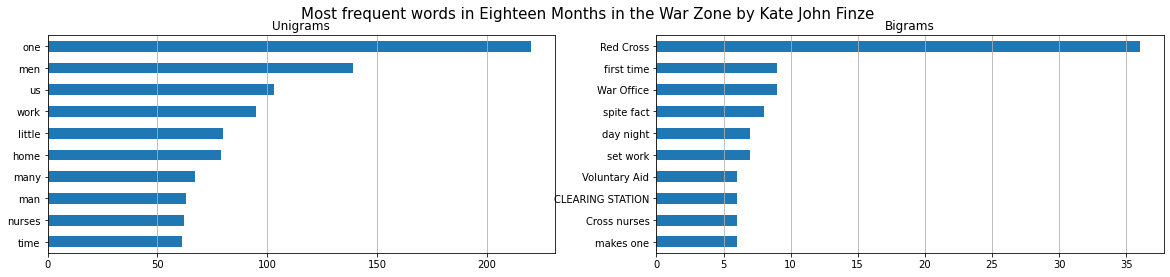

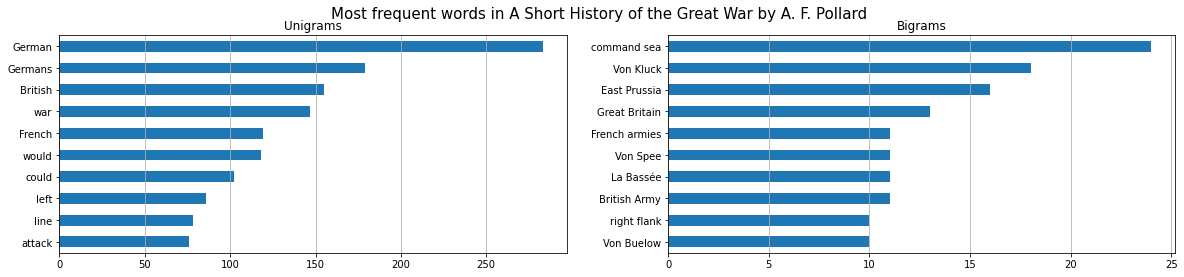

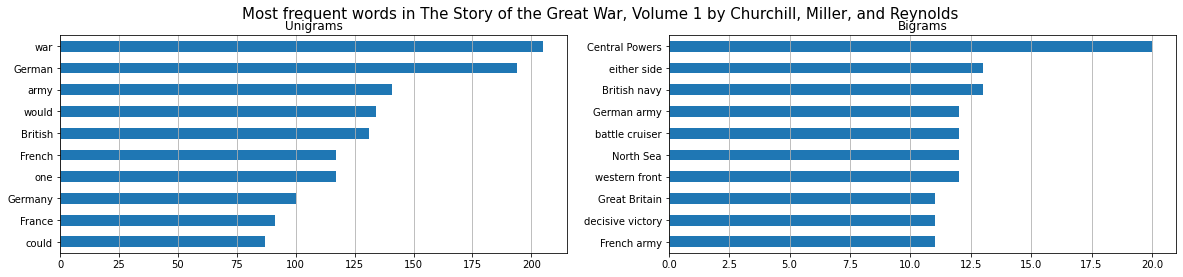

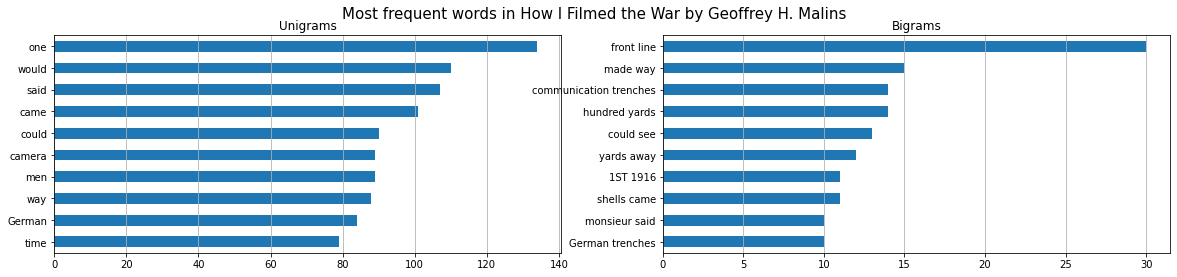

In [ ]:
for book in book_list:
  mostFreq(df,book)

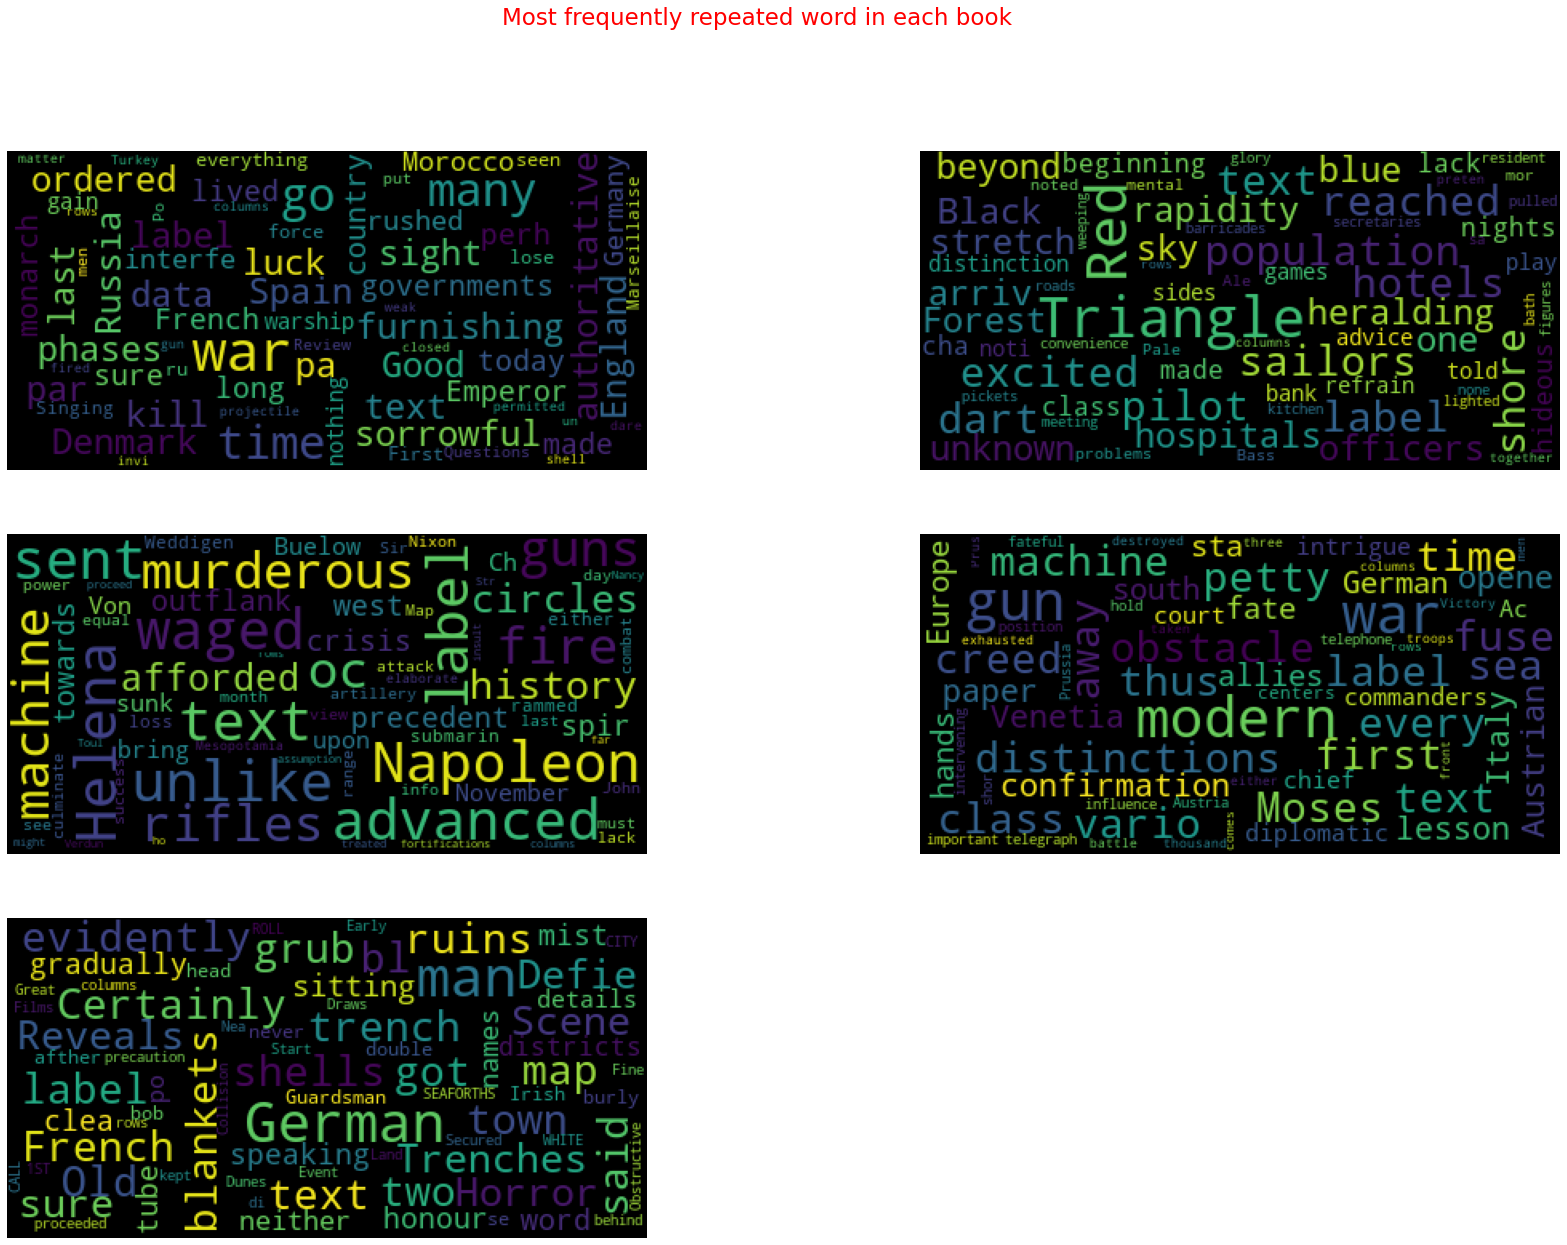

In [ ]:
import wordcloud
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 20))
fig.suptitle('Most frequently repeated word in each book',size=23,c='r')

plt.subplot(3,2, 1)
#plt.title("The World War and What was Behind It Or The Story of the Map of Europe by Bénézet")
wc = wordcloud.WordCloud(background_color='black', max_words=100, max_font_size=35)
wc = wc.generate(str(df[df['label']==1]))

fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)


plt.subplot(3,2, 2)
#plt.title("Eighteen Months in the War Zone by Kate John Finze")
wc = wordcloud.WordCloud(background_color='black', max_words=100, max_font_size=35)
wc = wc.generate(str(df[df['label']==2]))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)

plt.subplot(3,2, 3)
#plt.title(" A Short History of the Great War by A. F. Pollard")
wc = wordcloud.WordCloud(background_color='black', max_words=100, max_font_size=35)
wc = wc.generate(str(df[df['label']==3]))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)

plt.subplot(3,2, 4)
#plt.title(" The Story of the Great War")
wc = wordcloud.WordCloud(background_color='black', max_words=100, max_font_size=35)
wc = wc.generate(str(df[df['label']==4]))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)

plt.subplot(3,2, 5)
#plt.title("How I Filmed the War by Geoffrey H. Malins")
wc = wordcloud.WordCloud(background_color='black', max_words=100, max_font_size=35)
wc = wc.generate(str(df[df['label']==5]))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)

plt.show()

# Transformation and Classification Piplines

Transform to BOW, and TF-IDF, n-gram, (LDA, word-embedding, optional) etc.
before plugin data into classifier

In [ ]:
#Separate and set aside unbiased ---random--- partitions for training, validation and testing.
X = df.iloc[:,0]
y = df.iloc[:,-1].astype('int32')
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)

In [ ]:
#Separate and set aside unbiased ---random--- partitions for training, validation and testing.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)

In [ ]:
"""
Pipelines for transformation, training, testing and evaluation using cross validation.
Display results.
"""
def runClassification(X_train, y_train, pipline_steps, title):
    # Split data to (train and test)
    
    # Intalize the pipeline obj
    text_clf = Pipeline(pipline_steps)
    
    # Excute the training operation according to the assigned classifier in the pipeline
    text_clf.fit(X_train, y_train)
    
    return text_clf

def model_plot(text_clf,X,y,X_test,y_test,title):
    # Excute the testing operation to evaluate trained model performance
    y_pred = text_clf.predict(X_test)
    
    # Evaluation Phase
    plot_confusion_matrix(scv_bow, X_test, y_test,cmap=plt.cm.Blues)  
    plt.title = title
    
    txt2 = "Classification Report:\n {}".format(classification_report(y_test, y_pred))
    plt.text(6, 5, txt2, horizontalalignment='left',verticalalignment='bottom',size=16)

    # Cross Validation Step
    cv = KFold(n_splits=10)
    
    # Perform the cross validation according to the classifier used in the pipeline 
    scores = cross_val_score(text_clf, X, y, cv = cv)
    
    # the result of the cross validation
    txt3 ='Cross Validation Results: {}'.format( scores)
    plt.text(-1, 6, txt3, horizontalalignment='left',verticalalignment='bottom',size=16)
    txt4 ='Cross Validation Results mean: {}'.format( np.mean(scores))
    plt.text(-1, 7, txt4, horizontalalignment='left',verticalalignment='bottom',size=16)
    txt5 = 'The champion model in cross validation: {}'.format( np.argmax(scores))
    plt.text(-1, 8, txt5, horizontalalignment='left',verticalalignment='bottom',size=16)
    plt.show()
# End of the function

# This function take the predefined piplines senarios for each classifier and the data transformation 
# and perfrom it directly
def runPiplines(piplines,X,y):
  for title, pipline_steps in zip(piplines.keys(), piplines.values()):
    model = runClassification(X, y, pipline_steps, title)
    # End of for
# End of the function

## SVM


### BOW

In [ ]:
scv_bow_pip = {'title':'(BOW) SVM','steps':[
                                ('vect', CountVectorizer()),
                                ('clf', SGDClassifier(loss='hinge',random_state=0,)),
                                ],
}

scv_bow = runClassification(X_train,y_train,scv_bow_pip['steps'],scv_bow_pip['title'])

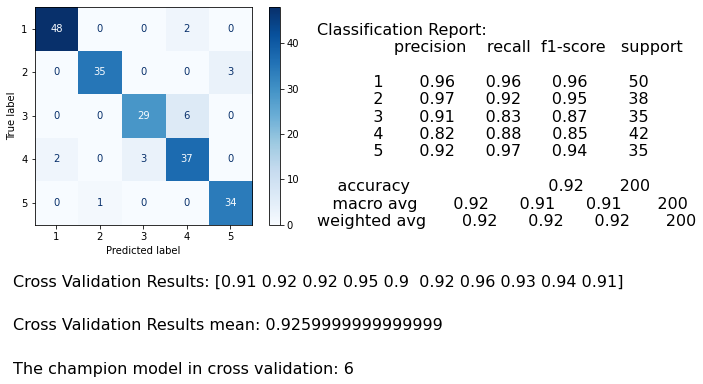

In [ ]:
model_plot(scv_bow,X,y,X_test,y_test,scv_bow_pip['title'])

In [ ]:
svc_tfidf_pip = {'title':'(Tfidf) SVM',
           'steps':[
                                  ('vect', CountVectorizer()),
                                  ('tfidf', TfidfTransformer()),
                                  ('clf', SGDClassifier(loss='hinge',random_state=0)),
                                  ]
}
scv_tfidf = runClassification(X_train,y_train,svc_tfidf_pip['steps'],svc_tfidf_pip['title'])

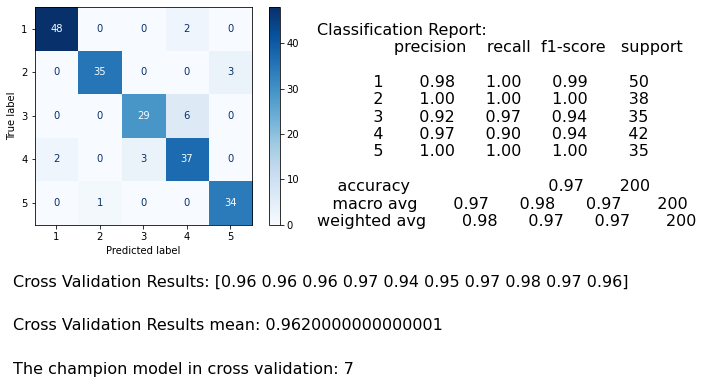

In [ ]:
model_plot(scv_tfidf,X,y,X_test,y_test,svc_tfidf_pip['title'])

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(
    vect__ngram_range= [(1,1),(1, 2),(1,3)],
    tfidf__use_idf= (True, False),
    clf__penalty = ['l1', 'l2', 'elasticnet'], 
    clf__alpha = [0.0001, 0.001, 0.01],
  ) 

grid_search = GridSearchCV(scv_tfidf, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

labels_pred = grid_search.predict(X_test)
np.mean(labels_pred == y_test)

0.975

In [ ]:
grid_search.best_params_

{'clf__alpha': 0.0001,
 'clf__penalty': 'l2',
 'tfidf__use_idf': True,
 'vect__ngram_range': (1, 1)}

## Decision Tree

### BOW

In [ ]:
ds_bow_pip = {'title':'(BOW) DecisionTree',
           'steps':[
                                ('vect', CountVectorizer()),
                                ('clf', DecisionTreeClassifier(random_state=0)),
                                           
                                ],
}
ds_bow = runClassification(X_train,y_train,ds_bow_pip['steps'],ds_bow_pip['title'])

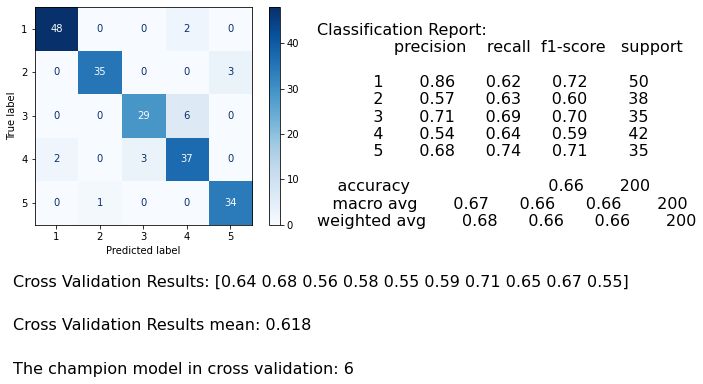

In [ ]:
model_plot(ds_bow,X,y,X_test,y_test,ds_bow_pip['title'])

### TFiDF

In [ ]:
dt_tfidf_pip = {'title':'(tfidf) DecisionTree',
           'steps':[
                                ('vect', CountVectorizer()),
                                 ('tfidf', TfidfTransformer()),
                                ('clf', DecisionTreeClassifier(random_state=0)),
                                           
                                ],
}
dt_tfidf = runClassification(X_train,y_train,dt_tfidf_pip['steps'],dt_tfidf_pip['title'])

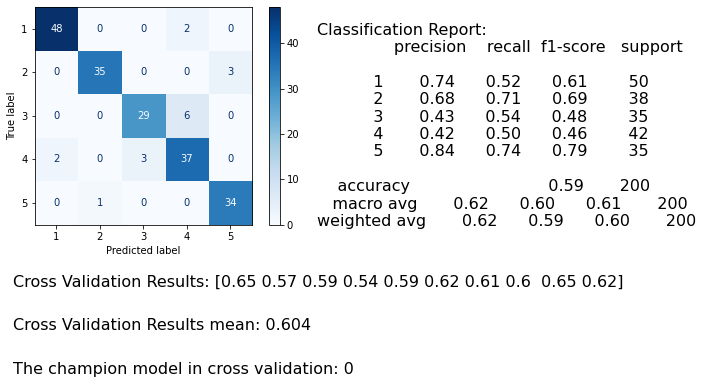

In [ ]:
model_plot(dt_tfidf,X,y,X_test,y_test,dt_tfidf_pip['title'])

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(
  vect__ngram_range= [(1, 1), (1, 2),(1,3)],
  tfidf__use_idf= (True, False),
  clf__max_depth=[13],
  clf__min_samples_split=[3,4,5],
  clf__min_samples_leaf=[1,2,3]
  ) 

grid_search = GridSearchCV(dt_tfidf, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

labels_pred = grid_search.predict(X_test)
np.mean(labels_pred == y_test)

0.595

## k-Nearest Neighbor

### BOW

In [ ]:
kn_bow_pip = {'title':'(BOW) KNeighbors',
           'steps':[
                                ('vect', CountVectorizer()),
                                ('clf', KNeighborsClassifier(n_neighbors=3)),
                                           
                                ],
}
kn_bow = runClassification(X_train,y_train,kn_bow_pip['steps'],kn_bow_pip['title'])

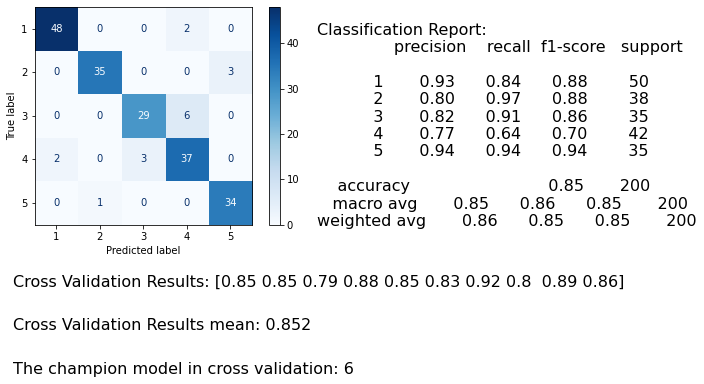

In [ ]:
model_plot(kn_bow,X,y,X_test,y_test,kn_bow_pip['title'])

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(
    vect__ngram_range= [(1,1),(1, 2),(1,3)],
    clf__n_neighbors=[11,10, 12],
    clf__leaf_size =[19,30,35],
    clf__p=[1,2],
    clf__weights= ['uniform', 'distance'],  
  ) 

grid_search = GridSearchCV(kn_bow, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

labels_pred = grid_search.predict(X_test)
np.mean(labels_pred == y_test)

0.905

### TFiDF

In [ ]:
kn_tfidf_pip = {'title':'(tfidf) KNeighbors',
           'steps':[
                                ('vect', CountVectorizer()),
                                 ('tfidf', TfidfTransformer()),
                                ('clf', KNeighborsClassifier(n_neighbors=3)),
                                           
                                ],
}
kn_tfidf = runClassification(X_train,y_train,kn_tfidf_pip['steps'],kn_tfidf_pip['title'])

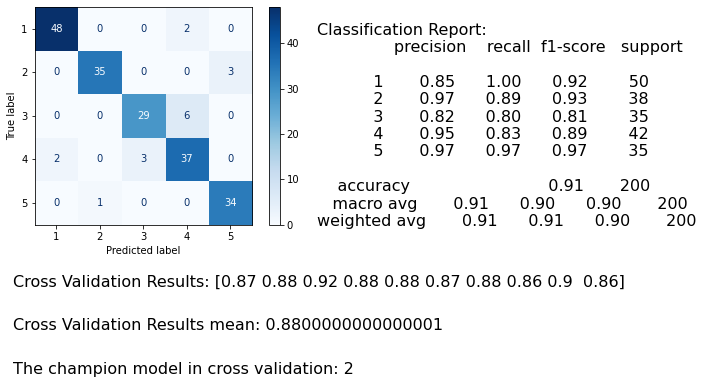

In [ ]:
model_plot(kn_tfidf,X,y,X_test,y_test,kn_tfidf_pip['title'])

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(
    vect__ngram_range= [(1,1),(1, 2)],
    tfidf__use_idf= (True, False),
    clf__n_neighbors=[11,10, 12],
    clf__leaf_size =[19,20],
    clf__p=[1,2],
    clf__weights= ['uniform', 'distance'],  
  ) 

grid_search = GridSearchCV(kn_tfidf, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

labels_pred = grid_search.predict(X_test)
np.mean(labels_pred == y_test)

0.89

# Error Analysis

In [41]:
y_predicted =  scv_tfidf.predict(X_test)

In [42]:
errors= [] 
for input, prediction, label in zip(X_test, y_predicted, y_test):
  if prediction != label:
    errors.append((input,(book_list[prediction-1],prediction),(book_list[label-1],label)))

In [43]:
errors

[('important effect expedition might concentration power Powers Central Empires Serbia successfully held gate Balkans Austria Rumania intervention would extend lines possible attack Greece inclined direction forcing Dardanelles would assuredly deterred Bulgaria hostile intervention almost certainly decided join common Balkan move Teutons Turks war Eastern Western fronts already German nightmare would added one almost undefended Southern frontier Austria could long resist Italy also intervened collapse Hapsburg Empire would open advance Germany south would circumvent Rhine Oder turn gigantic bastion constructed France Belgium house cards Well might Dardanelles expedition hailed press stroke strategical genius associated Churchill imagination Easy also understand concentrated fear',
  ('The Story of the Great War, Volume 1 by Churchill, Miller, and Reynolds',
   4),
  ('A Short History of the Great War by A. F. Pollard', 3)),
 ('coast mouth Somme Belgium Neither side succeeded Instead li

In [44]:
len(y_predicted)

200

In [45]:
errors[1][0]

'coast mouth Somme Belgium Neither side succeeded Instead line erected Oise due north German Ocean Nieuport became new battle front Antwerp fallen Germans made supreme effort shorten straighten line attacking French British Belgians held extreme left allied forces Nieuport La Bassée along Yser Ypres struggle lasted nearly month desperate extreme British gigantic repetition Waterloo asked hold position hours days heavy pressure face odds Napoleon possess earlier conflict end line held German approach Channel blocked December 1 western war dropped trench fighting still persists along lines substantially occupied November 1914 GERMAN FAILURE briefly history first German venture effort dispose France far'

In [46]:
from collections import Counter

def find_word(s,book):
  words_count = []
  st = s.split(" ")
  for i in range(0, len(st)):
    st[i] = "".join(st[i])
    dupli = Counter(st)
    s = " ".join(dupli.keys())
  for word in s.split(' ') : 
    count = len(re.findall(word,book))
    if count >0:
      words_count.append((word,count))
  return words_count

In [51]:
import re 

book2words = df['text'][df['label']==3]
#for part in book2words:
book = " ".join(book2words)
#book
s = errors[1][0]



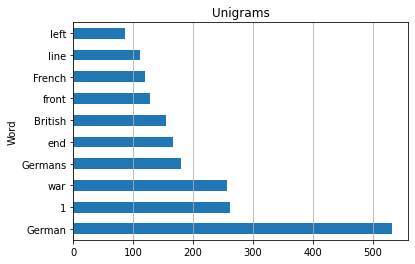

In [52]:
#fig, ax = plt.subplots(figsize=(20, 4))
#fig.suptitle("Most frequent words in ", fontsize=15)
    
## unigrams
data = find_word(s,book)
dtf_uni = pd.DataFrame(data, columns=["Word","Freq"])
dtf_uni=dtf_uni.sort_values(by="Freq",ascending=False)
dtf_uni.set_index("Word").iloc[:10,:].plot(
                  kind="barh", title="Unigrams",  
                  legend=False).grid(axis='x')


In [53]:
book2words = df['text'][df['label']==4]
#for part in book2words:
book = " ".join(book2words)
#book
s = errors[1][0]

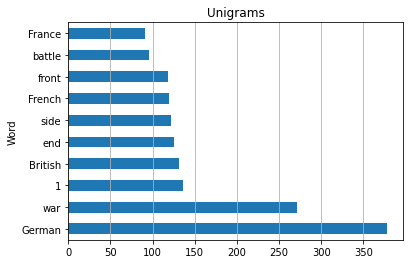

In [54]:
#fig, ax = plt.subplots(figsize=(20, 4))
#fig.suptitle("Most frequent words in ", fontsize=15)
    
## unigrams
data = find_word(s,book)
dtf_uni = pd.DataFrame(data, columns=["Word","Freq"])
dtf_uni=dtf_uni.sort_values(by="Freq",ascending=False)
dtf_uni.set_index("Word").iloc[:10,:].plot(
                  kind="barh", title="Unigrams",  
                  legend=False).grid(axis='x')